In [38]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import os
from scipy.stats import linregress
from astropy.io import fits
import elk
from elk.ensemble import EnsembleLC
import elk.utils as ut
import astropy.units as u
from astropy.coordinates.name_resolve import NameResolveError
from astroquery.skyview import SkyView
from astropy.coordinates import get_icrs_coordinates
import sys

start


Now investigating target IC 1 

diameter = 5.0 '
<SkyCoord (ICRS): (ra, dec) in deg
    (2.112722, 27.717665)>
Test2 has 2 observations
Starting Quality Tests for Observation: 0


100%|████████████████████████████████████████████████████████████████████████████████| 900/900 [01:14<00:00, 12.00it/s]


  Passed Quality Tests 
Starting Quality Tests for Observation: 1


100%|████████████████████████████████████████████████████████████████████████████████| 900/900 [04:47<00:00,  3.13it/s]


  Passed Quality Tests 


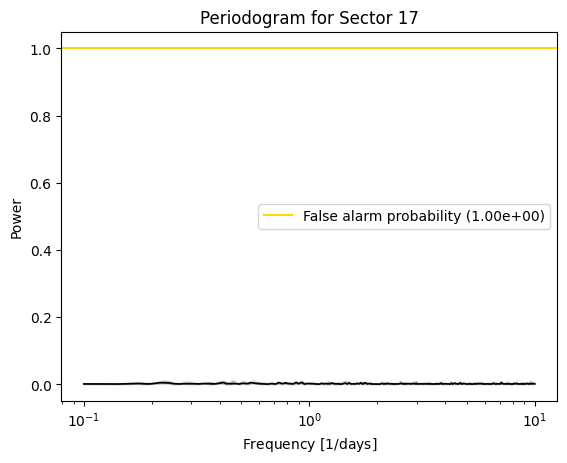

TypeError for sector 17 of IC 1


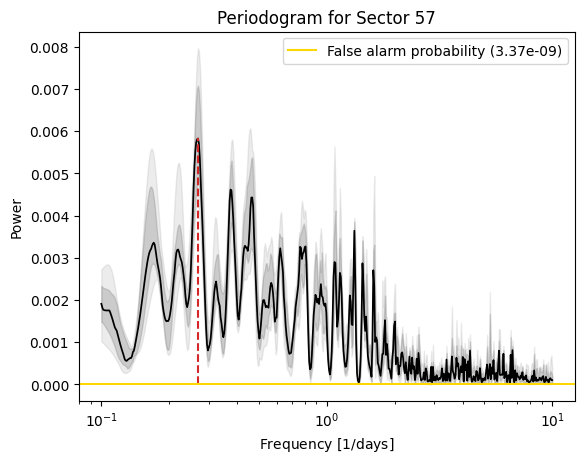

IndexError: boolean index did not match indexed array along dimension 1; dimension is 1096 but corresponding boolean dimension is 500

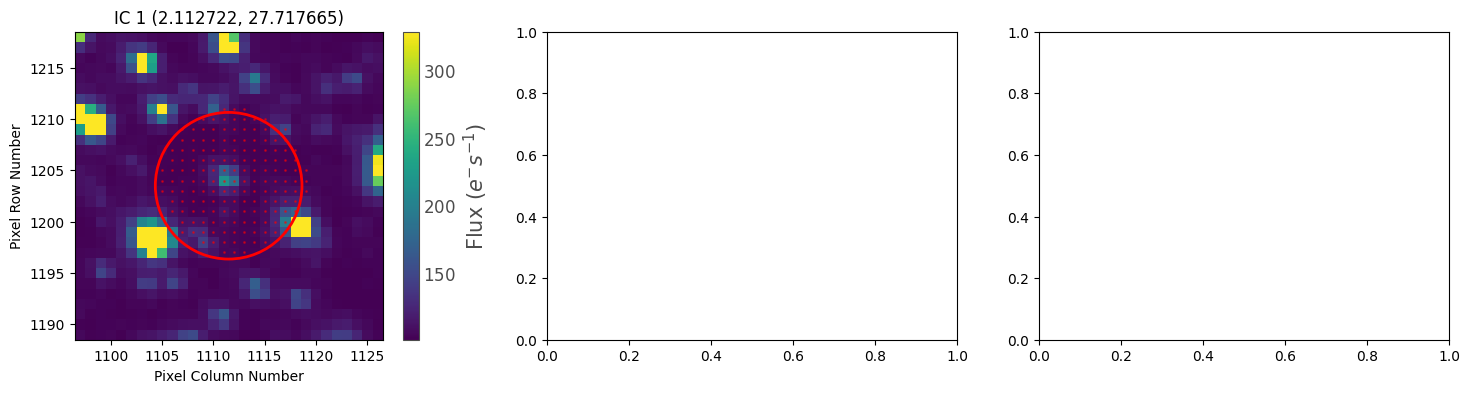

In [36]:
print('start')

lines = ['IC 1']
diameters = ['5']

for j,i in enumerate(lines):
    target = i.strip()
    target = target.replace("Ã¢â‚¬â€œ", "-")
    target_safename = target.replace(" ","")
    print("\n\nNow investigating target", target,'\n')
    try:
        diameter = float(diameters[j])
    except ValueError:
        print('Diameter is not a value, skip this object')
        continue
    radius_deg = diameter / 120
    print("diameter =", diameter, "'")
    if diameter <= 8.8:
        tpf_size = 30
    elif diameter <= 15.9:
        tpf_size = 50
    elif diameter <= 23.0:
        tpf_size = 70
    elif diameter <= 34.2:
        tpf_size = 99
    else:
        print('Radius too big! Skip this object.')
        continue
    try:
        source_coordinates = get_icrs_coordinates(target)
        print(source_coordinates)
        ra_deg = source_coordinates.ra.deg
        dec_deg = source_coordinates.dec.deg
        coords = f"{ra_deg}, {dec_deg}"
    except NameResolveError:
        print('\n\n',target,"not found. Move to next object.\n\n")
        sys.stdout = original_stdout
        continue
                
    a = EnsembleLC(output_path="elk results",
                   identifier='Test2',
                   location=coords,
                   radius=radius_deg,
                   cutout_size=tpf_size,
                   verbose=True)
    a.create_output_table()
    
    sectors = []
    if len(a.lcs) > 0:
        for sector in range(0,len(a.lcs)):
            lc = a.lcs[sector]
            if hasattr(lc, 'sector'):
                sectors.append(lc.sector)
                lc.to_periodogram(frequencies=np.logspace(-1, 1, 500), n_bootstrap=10)
                lc.plot_periodogram(save_path='elk results/Figures/'+target+'_LSP_'+str(lc.sector)+'.png')
                try:
                    lc.diagnose_lc_periodogram(output_path='elk results/Figures/', identifier=target)[0]
                except TypeError:
                    print('TypeError for sector',lc.sector,'of',target)
                    continue

                stats = lc.get_stats_using_defaults()
                elk_peakfreqs = stats['peak_freqs']
                elp_peakpowers = stats['power_at_peaks']
                five_powers = sorted(elp_peakpowers, reverse=True)[:5]
                indices = sorted(range(len(elp_peakpowers)), key=lambda i: elp_peakpowers[i], reverse=True)[:5]
                five_freqs = [elk_peakfreqs[i] for i in indices]
                print('\nsector',lc.sector)
                print('periodogram peaks:', five_freqs)
                print('\tpowers:', five_powers)    
            else:
                sectors.append("??")
    print('sectors:',sectors)
    
print('Dun Dun Dun Dunnn')

len fm 500


IndexError: boolean index did not match indexed array along dimension 1; dimension is 1096 but corresponding boolean dimension is 500

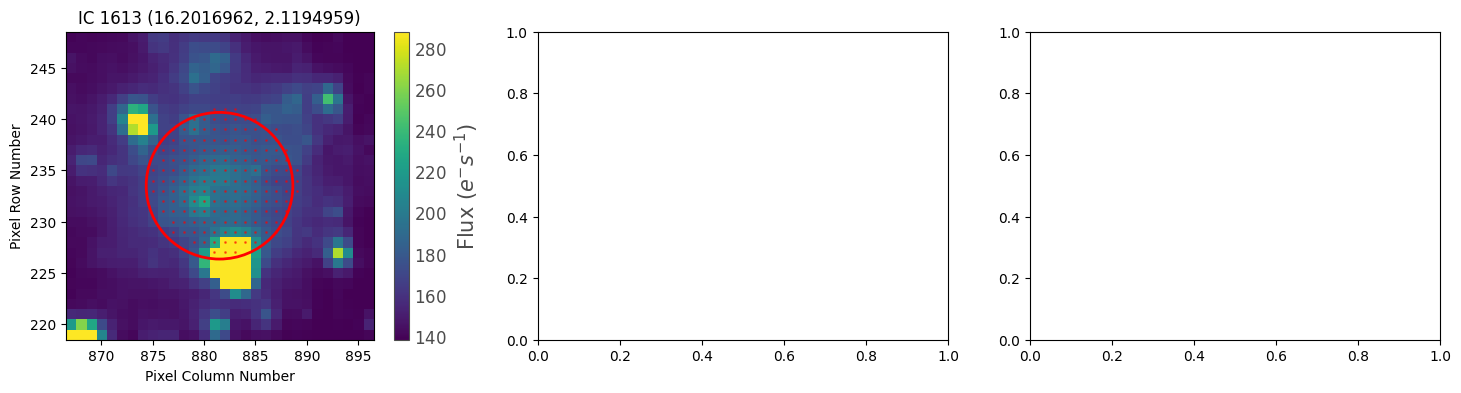

In [15]:
diagnose_lc_periodogram(lc, output_path='elk results/Figures/', identifier=target)[0]

In [37]:
        aperture_powers = np.asarray(lc.pixel_periodograms)[lc.star_mask.flatten()]
        lc.to_periodogram()
        bounds = list(zip(lc.stats["peak_left_edge"], lc.stats["peak_freqs"], lc.stats["peak_right_edge"]))
        for lower, center, upper in bounds:
            if lower > max(lc.periodogram_freqs):
                continue
            frequency_mask = (lc.periodogram_freqs >= lower) & (lc.periodogram_freqs < upper)
            pixel_powers = aperture_powers[:, frequency_mask]

IndexError: boolean index did not match indexed array along dimension 1; dimension is 1096 but corresponding boolean dimension is 500

In [4]:
    import elk
    from elk.ensemble import EnsembleLC
    import elk.utils as ut
    from astropy.coordinates import get_icrs_coordinates
    import numpy as np
    target = 'UGC 5470'
    diameter = 11.47
    radius_deg = diameter / 120
    tpf_size = 50
    source_coordinates = get_icrs_coordinates(target)
    ra_deg = source_coordinates.ra.deg
    dec_deg = source_coordinates.dec.deg
    coords = f"{ra_deg}, {dec_deg}"
                
    a = EnsembleLC(output_path="elk results",
                   identifier='UGC 5470',
                   location=coords,
                   radius=radius_deg,
                   cutout_size=tpf_size,
                   verbose=True)
    a.create_output_table()

UGC 5470 has 3 observations
Starting Quality Tests for Observation: 0
  Failed General Quality Test 
Starting Quality Tests for Observation: 1
  Failed General Quality Test 
Starting Quality Tests for Observation: 2


100%|██████████████████████████████████████████████████████████████████████████████| 2500/2500 [40:19<00:00,  1.03it/s]


  Passed Quality Tests 


AttributeError: 'NoneType' object has no attribute 'to_periodogram'

In [ ]:
lc = a.lcs[2]
lc.to_periodogram(frequencies=np.logspace(-1, 1, 500), n_bootstrap=10)

In [9]:
lc.diagnose_lc_periodogram(output_path='elk results/Figures/', identifier=target)[0]

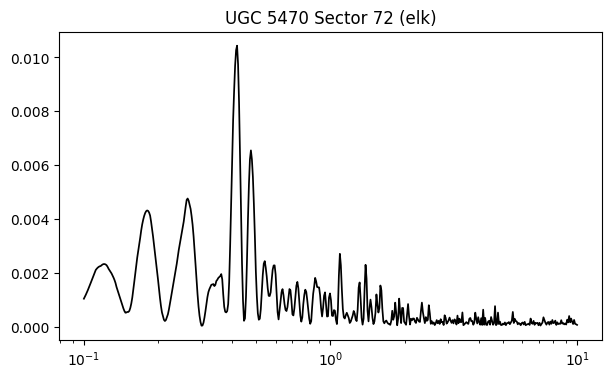

[0.4180637241455758, 0.4757236139187888, 0.26353705192673943, 0.1805148879221109, 1.0916317341936148]
[0.010438507695347196, 0.00654961170091606, 0.0047617062001681035, 0.004318684435482948, 0.00270776558768046]


In [39]:
    from scipy.signal import find_peaks
    from astropy.io import fits
    import lightkurve as lk
    import matplotlib.pyplot as plt
    
    """lc_elk = fits.open('elk results/Corrected_LCs/UGC 5470_lc_72.fits')
    data_e = lc_elk[1].data
    time = data_e['time']
    flux = data_e['flux']
    fig, ax = plt.subplots(figsize=(7, 4))
    tesslc = lk.LightCurve(time=time, flux=flux)
    pg = tesslc.to_periodogram(frequency=np.logspace(-1, 1, 500))
    pg.plot(ax=ax, color="black", linewidth=1.25)
    ax.set_xscale('log')"""
    lsp = lc.to_periodogram(frequencies=np.logspace(-1, 1, 500), n_bootstrap=10)
    powers = lsp[0]
    freqs = np.logspace(-1, 1, 500)
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.plot(freqs, lsp[0], color="black", linewidth=1.25)
    ax.set_xscale('log')
    ax.set_title('UGC 5470 Sector 72 (elk)')
    plt.show()
    
    """powers = pg.power.value
    freqs = pg.frequency.value"""
    peaks, _ = find_peaks(powers)
    peakfreqs = freqs[peaks]
    peakpowers = powers[peaks]
    sorted_peaks = sorted(zip(peakpowers, peakfreqs), reverse=True)[:5]
    powers_highestpeaks = [power for power, freq in sorted_peaks]
    freqs_highestpeaks = [freq for power, freq in sorted_peaks]
    print(freqs_highestpeaks)
    print(powers_highestpeaks)

In [9]:
TESS_RESOLUTION = 21 * u.arcsec / u.pixel
    def diagnose_lc_periodogram(self, output_path, freq_bins='auto', identifier='', query_simbad=True):

        # ensure the necessary data is available to run this
        assert self.save_pixel_periodograms, ("Pixel periodograms not available. Set "
                                              "`self.save_pixel_periodograms=True` and re-run "
                                              "`self.correct_lc`")

        # mask the pixel powers to only be for pixels in the aperture
        assert hasattr(self, "star_mask"), "No aperture mask found - have you run `self.correct_lc`?"
        aperture_powers = np.asarray(self.pixel_periodograms)[self.star_mask.flatten()]
        assert len(aperture_powers) > 0, "No pixel periodograms found - did you run `self.correct_lc`?"

        # ensure output folder and subfolder exists
        assert os.path.exists(output_path), f"No folder found at output_path: {output_path}"
        if not os.path.exists(os.path.join(output_path, 'diagnostics')):
            os.mkdir(os.path.join(output_path, 'diagnostics'))

        if query_simbad:
            simbad_results = None

        # convert input into bin bounds
        if isinstance(freq_bins, str):
            assert freq_bins == "auto", "`freq_bins` can only be a str if it is equal to 'auto'"
            self.to_periodogram()
            bounds = list(zip(self.stats["peak_left_edge"], self.stats["peak_freqs"],
                              self.stats["peak_right_edge"]))
        else:
            if isinstance(freq_bins, int):
                freq_bins = np.logspace(min(self.periodogram_freqs), max(self.periodogram_freqs), freq_bins)
            bounds = list(zip(freq_bins[:-1], 0.5 *(freq_bins[:-1] + freq_bins[1:]), freq_bins[1:]))

        # create a separate frame for each frequency bin
        i = 0
        for lower, center, upper in bounds:
            if lower > max(self.periodogram_freqs):
                continue
            # start a three panel figure
            fig, axes = plt.subplots(1, 3, figsize=(18, 4))

            # plot the entire target pixel file in the first axis
            self.quality_tpfs.plot(frame=len(self.quality_tpfs) // 2, ax=axes[0])

            # create a circle around the aperture
            x_range = axes[0].get_xlim()[1] - axes[0].get_xlim()[0]
            y_range = axes[0].get_ylim()[1] - axes[0].get_ylim()[0]
            circle = plt.Circle(xy=(axes[0].get_xlim()[0] + x_range / 2, axes[0].get_ylim()[0] + y_range / 2),
                                radius=(self.radius * u.deg / TESS_RESOLUTION).to(u.pixel).value,
                                edgecolor="red", facecolor="none", linewidth=2)
            axes[0].add_artist(circle)
            axes[0].set_title(f'{identifier} ({self.quality_tpfs[0].ra}, {self.quality_tpfs[0].dec})')

            # get the indices of the aperture pixels and plot a marker on each pixel that matches
            pixel_inds = np.argwhere(self.star_mask)
            axes[0].scatter(axes[0].get_xlim()[0] + pixel_inds[:, 1] + 0.5,
                            axes[0].get_ylim()[0] + pixel_inds[:, 0] + 0.5,
                            c='r', s=1, alpha=0.5)

            # create a mask for the frequency range
            frequency_mask = (self.periodogram_freqs >= lower) & (self.periodogram_freqs < upper)

            # get power in each pixel that is within the aperture and for the given frequency range
            pixel_powers = aperture_powers[:, frequency_mask]

            # get the max power in each pixel
            pixel_max_power = np.zeros([self.cutout_size, self.cutout_size], dtype='float64')
            pixel_max_power[self.star_mask] = np.max(pixel_powers, axis=1)

            if query_simbad:
                query_pixels = np.argwhere(pixel_max_power > 0.9 * np.max(pixel_max_power))

                world_values = np.array(self.quality_tpfs.wcs.pixel_to_world_values(np.fliplr(query_pixels)))
                ra, dec = world_values[:, 0], world_values[:, 1]

                # create custom simbad that includes variable star columns
                var_Simbad = Simbad()
                var_Simbad.add_votable_fields('v*', 'otype', 'flux(V)')

                # query SIMBAD for a region that fully encloses the pixel
                pixel_radius = (TESS_RESOLUTION * (1 * u.pixel)).to(u.deg) * np.sqrt(2)
                query_result = var_Simbad.query_region(coord.SkyCoord(ra=ra, dec=dec,
                                                       unit=(u.deg, u.deg), frame='icrs'),
                                                       radius=pixel_radius)

                query_result=query_result['MAIN_ID', 'RA', 'DEC', 'V__vartyp', 'V__Vmax', 'V__R_Vmax', 
                                          'V__magtyp', 'V__UpVmin', 'V__Vmin', 'V__R_Vmin', 'V__UpPeriod', 
                                          'V__period', 'V__R_period', 'OTYPE', 'FLUX_V']
                
                if query_result is not None:
                    # only selecting the columns we want
                    query_result = query_result['MAIN_ID', 'RA', 'DEC', 'V__vartyp', 'V__Vmax', 'V__R_Vmax',
                                                'V__magtyp', 'V__UpVmin', 'V__Vmin', 'V__R_Vmin',
                                                'V__UpPeriod', 'V__period', 'V__R_period', 'OTYPE', 'FLUX_V']
                    
                    # add columns indicating which peak these are associated with
                    query_result.add_column(Column([round(center, 3)]), name='peak_freq')
                    query_result.add_column(Column([round(lower, 3)]), name='peak_lower')
                    query_result.add_column(Column([round(upper, 3)]), name='peak_upper')

                    if simbad_results is None:
                        # if this is the first query then just save
                        simbad_results = query_result
                    else:
                        # otherwise concatenate with previous queries
                        simbad_results = vstack([simbad_results, query_result],
                                                join_type="exact", metadata_conflicts="silent")
                                                

            # plot the max power in each pixel in the same range as the right panel
            im = axes[1].imshow(pixel_max_power, extent=list(axes[0].get_xlim()) + list(axes[0].get_ylim()),
                                origin='lower', cmap='Greys', vmax=max(self.periodogram))

            cbar = fig.colorbar(im, ax=axes[1])
            cbar.set_label('LS periodogram power')
            axes[1].set_title('Maximum Lomb Scargle Power')

            axes[1].annotate((f'Frequency: {(lower + upper) / 2:1.2f} 1/day\n'
                              f'Range: [{lower:1.2f}, {upper:1.2f}] 1/day'), xy=(0.5, 0.95),
                             xycoords="axes fraction", ha="center", va="top")

            circle = plt.Circle(xy=(axes[0].get_xlim()[0] + x_range / 2, axes[0].get_ylim()[0] + y_range / 2),
                                radius=(self.radius * u.deg / TESS_RESOLUTION).to(u.pixel).value,
                                edgecolor="red", facecolor="none", linestyle="dotted")
            axes[1].add_artist(circle)

            # plot the LS periodogram for the ensemble cluster LC
            fig, axes[2] = self.plot_periodogram(self.periodogram_freqs, fig=fig, ax=axes[2], show=False,
                                                 title="Ensemble Light Curve Periodogram")
            axes[2].axvspan(lower, upper, color="lightgrey", zorder=-1)

            # save and close the figure and move on to the next
            fig.savefig(os.path.join(output_path, 'diagnostics', f'{identifier}_gif_plot_frame_{self.sector}_{i}.png'),
                        bbox_inches="tight")
            plt.close(fig)
            i += 1

        simbad_results["MAIN_ID"] = simbad_results["MAIN_ID"].astype('str')
        simbad_results["OTYPE"] = simbad_results["OTYPE"].astype('str')

        # save the simbad results
        simbad_results.write(os.path.join(output_path, 'diagnostics',
                                          f'{identifier}_simbad_results.hdf5'),
                             path='data', serialize_meta=True, overwrite=True)


        # convert individual frames to a GIF
        gif_path = os.path.join(output_path, 'diagnostics', f'{identifier}_pixel_power_gif_{self.sector}.gif')
        with imageio.get_writer(gif_path, mode='I', duration=400) as writer: #fps=2.5
            for i in range(len(bounds)):
                writer.append_data(imageio.imread(os.path.join(output_path, 'diagnostics',
                                                               f'{identifier}_gif_plot_frame_{self.sector}_{i}.png')))
                
        #get GIF back
        gif = HTML(f'<img src="{gif_path}">')

        return gif, simbad_results 